<a href="https://colab.research.google.com/github/santiago-vas/santiago-vas/blob/main/PGD_Skincare_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> Senior Data Analyst Challenge 2024
<center><h1> Publicis Global Delivery
</center></h1></center></h1>

---

DAVID SANTIAGO VASQUEZ NARANJO

---
En el siguiente codigo se lleva a cabo el analisis exploratorio de los siguientes datos:
1. RFI Data
2. DA Data

Emepzando desde la limpieza o "data wrangling" para la correcta manipulacion de los datos hasta llegar a crear metricas que nos guien a decisiones corporativas acertadas.

---
Bogota Enero 2024

</center>

---
# 0. Configuracion del entorno

La configuracion del entorno consiste en la importacion de librerias a usar asi como tambien rutas generales para lectura o guardado de archivos, funciones de limpieza tanto de filas como columnas, graficas de completitud, graficas generales.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@markdown Librerias  basicas
import numpy as np
from os import path
import pandas as pd
from datetime import timedelta
import math

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
from math import nan,  inf
from datetime import date, datetime
from string import digits

import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from mpl_toolkits.mplot3d import Axes3D

# import sys
# !{sys.executable} -m pip install pandas-profiling

# import pandas_profiling
# # from pandas_profiling.utils.cache import cache_file

In [3]:
#@markdown Definicion ruta principal para lectura y guardado de informacion

ruta_princ = '/content/drive/MyDrive/Publicis Global Delivery Pruebas'



In [4]:
#@markdown * Funciones limpieza Data
#-------------------------------------------------------------------------------
def eliminar_columnas_vacias(dataframe,porcentaje):
  tasa_de_vacio = round(dataframe.isnull().mean()*100,3)
  columnas_vacias = (tasa_de_vacio>porcentaje)
  dataframe =  dataframe [columnas_vacias[~columnas_vacias].index]
  return dataframe

#-------------------------------------------------------------------------------
def eliminar_filas_incompletas(dataframe,porcentaje):
  completitud = dataframe.apply(lambda x: (((x.count()/dataframe.shape[1])*100)>porcentaje), axis=1)
  dataframe =  dataframe [completitud]
  return dataframe

#-------------------------------------------------------------------------------
def limpiar_archivo(dataset,porcentaje_columnas,porcentaje_filas):
  print('Antes de la limpieza : ', dataset.shape )
  dataset = eliminar_columnas_vacias(dataset,porcentaje_columnas) # parametros ( dataframe , porcentaje de vacio)
  # dataset = eliminar_filas_incompletas(dataset,porcentaje_filas) # parametros ( dataframe , porcentaje de vacio)

  print('Despues de la limpieza : ', dataset.shape )
  return dataset
#-------------------------------------------------------------------------------
def limpiar_archivo2(dataset,porcentaje_columnas,porcentaje_filas):
  print('Antes de la limpieza : ', dataset.shape )
  graficar_cantidad_nulos(dataset)

  dataset = eliminar_columnas_vacias(dataset,porcentaje_columnas) # parametros ( dataframe , porcentaje de vacio)
  # dataset = eliminar_filas_incompletas(dataset,porcentaje_filas) # parametros ( dataframe , porcentaje de vacio)

  print('Despues de la limpieza : ', dataset.shape )
  graficar_cantidad_nulos(dataset)
  return dataset
#-------------------------------------------------------------------------------
def limpiar_vacios_dataset(dataset,porcentaje_columnas,porcentaje_filas):
  print('Antes de la limpieza : ', dataset.shape )
  graficar_cantidad_nulos(dataset)

  dataset = eliminar_columnas_vacias(dataset,porcentaje_columnas) # parametros ( dataframe , porcentaje de vacio)
  dataset = eliminar_filas_incompletas(dataset,porcentaje_filas) # parametros ( dataframe , porcentaje de vacio)

  print('Despues de la limpieza : ', dataset.shape )
  graficar_cantidad_nulos(dataset)
  return dataset

#-------------------------
# @markdown * Funcion para limpieza y estandarizacion de caracteres, en variables categoricas
spec_char = '[!"$%\'()*+,_./:;<=>?[\\]^_`{|}~-]'
non_spec_char = lambda x: re.sub(spec_char,'', str(x))
a,b = 'ÁÉÍÓÚÜÑ¥áéíóú_-','AEIOUUNNaeiou  '
non_accent = lambda x: str(x).translate(str.maketrans(a,b))

nonums = '[!"#$%&\'\.\()-*@+,/:;<=>?[\\]^_`{|}~ABCDEFGHIJKLMNÑOPQRSTUVWXYZabcdefghijklmñnopqrstuvwxyzáéíóúÁÉÍÓÚÃÈÄäǞǟ´ÀÈÐÖ#&Ã±Ą̈ą̈B̈b̈C̈c̈ËëḦḧÏïḮḯJ̈j̈K̈k̈L̈l̈M̈m̈N̈n̈ÖöȪȫṎṏǪ̈ǫ̈P̈p̈Q̈q̈Q̣̈q̣̈S̈s̈T̈ẗÜüǗǘǛǜǙǚǕṺǖṻṲṳṲ̄ṳ̄ᴞV̈v̈ẄẅẌẍŸÿZ̈z̈ΪϊῒΐῗΫϋϔῢΰῧӒӓЁёӚӛӜӝӞӟӤӥЇїӦӧӪӫӰӱӴӵӸӹӬӭ]'
only_nums = lambda x: re.sub(nonums,'', str(x))

spaces = lambda x: str(x).strip()
none_spaces = lambda x: str(x).replace(' ', '')
double_spaces = lambda x: re.sub('\\s{2,}',' ', str(x))
mayusc = lambda x: str(x).upper()
minusc = lambda x: str(x).lower()


In [5]:
#@markdown Funcion de visualizacion de completitud de informacion

#-------------------------------------------------------------------------------
def graficar_cantidad_nulos(dataframe):
  data_auxiliar = dataframe.copy()
  tasa_de_vacio = round(data_auxiliar.isnull().mean()*100,3)
  plt.figure(figsize=(15,5))
  tasa_de_vacio.plot(kind = 'bar')
  plt.title('Porcentaje de incompletitud')
  plt.ylabel('Porcentaje [%]')
  plt.grid(1)
  plt.show()

# 1. Archivo  "GA Data"



In [6]:
GA= pd.read_excel(ruta_princ+"/GA Data.xlsx")
print(GA.shape)

# validar existencia de valores duplicados
GA=GA.drop_duplicates(subset=['Source',	'Month of Year',	'Device Category'	,'Ad Content'])

# Funcion describe para analisis general de las columnas del datase y validar posible existencia de valores nulos
GA.describe(include = "all")

(2403, 10)


,Source,Month of Year,Device Category,Ad Content,Sessions,Users,New Users,Pageviews,Session Duration,Calculated AToS
count,2403,2403.000000,2223,2403,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403
unique,19,NaN,4,301,NaN,NaN,NaN,NaN,NaN,839
top,Zeta,NaN,desktop,AudienceSDOnly.NU1559Branded.300,NaN,NaN,NaN,NaN,NaN,00:00:00
freq,341,NaN,887,21,NaN,NaN,NaN,NaN,NaN,1162
mean,NaN,202107.229713,NaN,NaN,56.498127,46.229297,45.154390,70.722014,1337.803579,NaN
std,NaN,1.899998,NaN,NaN,435.862209,310.242349,304.442742,390.500138,8163.293984,NaN
min,NaN,202104.000000,NaN,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,NaN
25%,NaN,202106.000000,NaN,NaN,2.000000,2.000000,2.000000,2.000000,0.000000,NaN
50%,NaN,202107.000000,NaN,NaN,6.000000,6.000000,5.000000,7.000000,4.000000,NaN
75%,NaN,202109.000000,NaN,NaN,18.000000,17.000000,17.000000,25.000000,461.500000,NaN


,Source,Month of Year,Device Category,Ad Content,Sessions,Users,New Users,Pageviews,Session Duration,Calculated AToS,sessions in hours
0,Acuity,202104,NaN,AcuityCrossixTargeting.SD_1624_v3_Symptom.728,1,1,1,1,0,00:00:00,0:00:00
1,Acuity,202104,NaN,AcuityPropensityTargeting.Dermicool_SDP_DTP_Un...,1,1,1,1,0,00:00:00,0:00:00
2,Aptus,202104,NaN,AptusDermicoolRetailDTP.NU1712.320x50,331,254,251,840,18129,05:02:09,5:02:09
3,Aptus,202104,NaN,AptusDermicoolLTCDTP.NU1545.320x50,118,99,97,171,6001,01:40:01,1:40:01
4,Aptus,202104,NaN,AptusDermicoolLTCDTP.NU1570.320x50,12,9,9,33,2623,00:43:43,0:43:43
...,...,...,...,...,...,...,...,...,...,...,...
2398,Zeta,202110,tablet,SDPCrossix.NU1624UnbrandedSymp.728,1,1,1,1,0,00:00:00,0:00:00
2399,Zeta,202110,tablet,SDPCrossix.NU2333SpeakUp.320,14,14,14,19,19,00:00:19,0:00:19
2400,AdPrime,202110,desktop,PatientCaregiverLeadGen.LeadGen.1,1851,1743,1742,2037,75420,20:57:00,20:57:00
2401,AdPrime,202110,mobile,PatientCaregiverLeadGen.LeadGen.1,822,733,730,950,50185,13:56:25,13:56:25


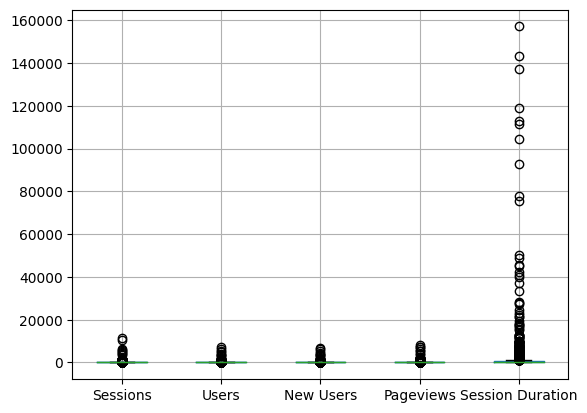

In [7]:
# validar la relacion de las columnas Calculated ATos vs Session Duration

def convert(seconds):
    min, sec = divmod(seconds, 60)
    hour, min = divmod(min, 60)
    return '%d:%02d:%02d' % (hour, min, sec)

# with help of boxplot I found out the existence of incorrect values at the column "Calculated AToS" which according to other values is just the conversion of
# column "Session Duration" into hours, and then we can fix it
GA.boxplot(column=['Sessions',	'Users'	,'New Users'	,'Pageviews'	,'Session Duration'])
GA[GA['Session Duration']>60000]

#seconds to hours function
GA['sessions in hours'] = GA['Session Duration'].apply(lambda x : convert(x))
GA

In [8]:
# fix date column
GA["Month"] = GA["Month of Year"].apply(lambda x : datetime.strptime(str(x), "%Y%m"))
GA

,Source,Month of Year,Device Category,Ad Content,Sessions,Users,New Users,Pageviews,Session Duration,Calculated AToS,sessions in hours,Month
0,Acuity,202104,NaN,AcuityCrossixTargeting.SD_1624_v3_Symptom.728,1,1,1,1,0,00:00:00,0:00:00,2021-04-01
1,Acuity,202104,NaN,AcuityPropensityTargeting.Dermicool_SDP_DTP_Un...,1,1,1,1,0,00:00:00,0:00:00,2021-04-01
2,Aptus,202104,NaN,AptusDermicoolRetailDTP.NU1712.320x50,331,254,251,840,18129,05:02:09,5:02:09,2021-04-01
3,Aptus,202104,NaN,AptusDermicoolLTCDTP.NU1545.320x50,118,99,97,171,6001,01:40:01,1:40:01,2021-04-01
4,Aptus,202104,NaN,AptusDermicoolLTCDTP.NU1570.320x50,12,9,9,33,2623,00:43:43,0:43:43,2021-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2398,Zeta,202110,tablet,SDPCrossix.NU1624UnbrandedSymp.728,1,1,1,1,0,00:00:00,0:00:00,2021-10-01
2399,Zeta,202110,tablet,SDPCrossix.NU2333SpeakUp.320,14,14,14,19,19,00:00:19,0:00:19,2021-10-01
2400,AdPrime,202110,desktop,PatientCaregiverLeadGen.LeadGen.1,1851,1743,1742,2037,75420,20:57:00,20:57:00,2021-10-01
2401,AdPrime,202110,mobile,PatientCaregiverLeadGen.LeadGen.1,822,733,730,950,50185,13:56:25,13:56:25,2021-10-01


In [9]:
# eliminar columnas innecesarias
GA=GA.drop('Calculated AToS',axis = 1)
GA=GA.drop('Month of Year',axis = 1)

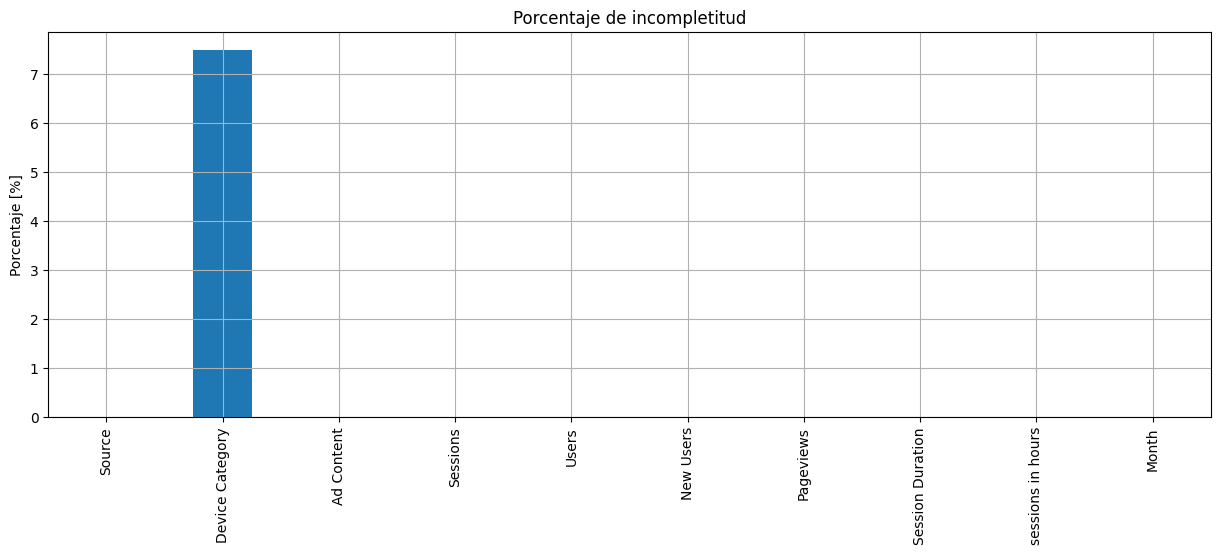

desktop         887
mobile          769
tablet          564
NA              180
cross device      3
Name: Device Category, dtype: int64


In [10]:
# limpieza de valores nulos
graficar_cantidad_nulos(GA)

# it seems that just in the column "device category" exist null values
GA["Device Category"]=GA["Device Category"].fillna('NA')
print(GA["Device Category"].value_counts())

In [11]:
# for better analysis is helpful to stablish labels for small and big sources, in that way we can see the real performance of each group
# GA.groupby(by=["Users"], dropna=False).sum()


ga_extra = pd.DataFrame(GA.groupby(['Source'])["Users"].sum()).reset_index()
ga_extra['label']=ga_extra["Users"].apply(lambda x : 'Big Source' if x >6000 else 'Medium Source' if (x >= 1000 and x <= 6000) else 'Small Source')
ga_extra.loc[:,['Source','label']]

GA=GA.merge(ga_extra.loc[:,['Source','label']], on='Source', how='left')



In [12]:
# for better analysis is helpful to stablish labels for small and big sources, in that way we can see the real performance of each group
# GA.groupby(by=["Users"], dropna=False).sum()


ga_extra = pd.DataFrame(GA.groupby(['Ad Content'])["Users"].sum()).reset_index()
ga_extra.sort_values(by='Users')
ga_extra['label Ad']=ga_extra["Users"].apply(lambda x : 'Big Ad' if x >2000 else 'Medium Ad' if (x >= 500 and x <= 2000) else 'Small Ad')

GA=GA.merge(ga_extra.loc[:,['Ad Content','label Ad']], on='Ad Content', how='left')
GA



,Source,Device Category,Ad Content,Sessions,Users,New Users,Pageviews,Session Duration,sessions in hours,Month,label,label Ad
0,Acuity,NA,AcuityCrossixTargeting.SD_1624_v3_Symptom.728,1,1,1,1,0,0:00:00,2021-04-01,Small Source,Small Ad
1,Acuity,NA,AcuityPropensityTargeting.Dermicool_SDP_DTP_Un...,1,1,1,1,0,0:00:00,2021-04-01,Small Source,Small Ad
2,Aptus,NA,AptusDermicoolRetailDTP.NU1712.320x50,331,254,251,840,18129,5:02:09,2021-04-01,Big Source,Small Ad
3,Aptus,NA,AptusDermicoolLTCDTP.NU1545.320x50,118,99,97,171,6001,1:40:01,2021-04-01,Big Source,Small Ad
4,Aptus,NA,AptusDermicoolLTCDTP.NU1570.320x50,12,9,9,33,2623,0:43:43,2021-04-01,Big Source,Small Ad
...,...,...,...,...,...,...,...,...,...,...,...,...
2398,Zeta,tablet,SDPCrossix.NU1624UnbrandedSymp.728,1,1,1,1,0,0:00:00,2021-10-01,Big Source,Small Ad
2399,Zeta,tablet,SDPCrossix.NU2333SpeakUp.320,14,14,14,19,19,0:00:19,2021-10-01,Big Source,Small Ad
2400,AdPrime,desktop,PatientCaregiverLeadGen.LeadGen.1,1851,1743,1742,2037,75420,20:57:00,2021-10-01,Medium Source,Big Ad
2401,AdPrime,mobile,PatientCaregiverLeadGen.LeadGen.1,822,733,730,950,50185,13:56:25,2021-10-01,Medium Source,Big Ad


<ipython-input-13-7078f542bd35>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(GA.corr())


<Axes: >

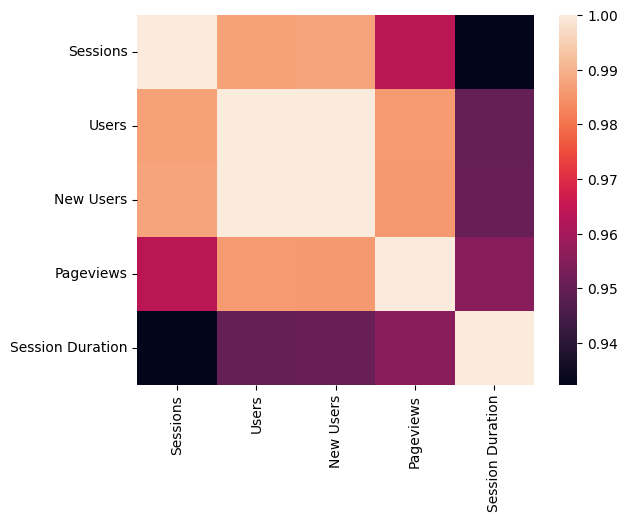

In [13]:
sns.heatmap(GA.corr())

### it seems like the GA data set its already grouped so it doesnt need any other sum action, I will send this data to power BI to make visuals and extracts insights



# --------------------------------------------------------------------------------------------------------




# 2. Archivo  "RFI Data"



In [112]:
rfi= pd.read_excel(ruta_princ+"/RFI Data.xlsx")
print(rfi.shape)

# la columna Campaign is redundant with the same value in all table, so its easy to delete it and get more efficient processing times
rfi = rfi.drop("Campaign",axis =1)

(4244, 9)


In [113]:
# validar existencia de valores duplicados
rfi[rfi.duplicated().tolist()].iloc[:60,:]
rfi=rfi.drop_duplicates(keep='first')
print("new shape of the table after deleting duplicate values",rfi.shape)

# # Funcion describe para analisis general de las columnas del datase y validar posible existencia de valores nulos
rfi.describe(include = "all")

new shape of the table after deleting duplicate values (4015, 8)


,Month,Site (Site Directory),Placement - DCM,Creative,Creative Dimensions,Platform Type,Impressions,Clicks
count,4015,4015,4015,4015,4015,3439,4.015000e+03,4015.000000
unique,10,21,57,9,6,7,NaN,NaN
top,2021-06,Zeta Global,Skin Disease Crossix Segment Targeting,SD_1624_v3_Symptom,300x250,Desktop,NaN,NaN
freq,625,589,554,1404,1320,1090,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.815765e+04,73.623661
std,NaN,NaN,NaN,NaN,NaN,NaN,1.372599e+05,685.571425
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.300000e+01,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,8.190000e+02,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.034400e+04,11.000000


In [114]:
# looks like Site (Site Directory) column has values which changes a little bit bettwen rows.
# For easier analysis on this data set i assume these names with little diffrences just like the same one, i have to normalice them

print(sorted(rfi["Site (Site Directory)"].unique()))

rfi["Site (Site Directory)"] = rfi["Site (Site Directory)"].replace({'Health Union, LLC': 'Health Union'
                                          ,'goodrx.com':'GoodRx'
                                          ,'GoodRx '   : 'GoodRx'
                                          ,'Medicx Media Solutions':'Medicx'
                                          ,'Remedy Health Media, LLC':'Remedy Health'
                                          })
rfi

['Adprime Media Inc', 'Adtheorent', 'Aptus Health', 'Emodo', 'Facebook', 'GoodRx ', 'Health Union', 'Health Union, LLC', 'Healthline', 'Media IQ', 'Medicx', 'Medicx Media Solutions', 'MyHealthTeams, Inc.', 'Remedy Health', 'Remedy Health Media, LLC', 'Sharecare', 'Skin Disease News Today', 'Swoop', 'WebMD', 'Zeta Global', 'goodrx.com']


,Month,Site (Site Directory),Placement - DCM,Creative,Creative Dimensions,Platform Type,Impressions,Clicks
0,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,160x600,NaN,494,8
1,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,300x250,NaN,5499,81
2,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,728x90,NaN,833,2
3,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1624_v3_Symptom,160x600,NaN,424,4
4,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1624_v3_Symptom,300x250,NaN,5431,73
...,...,...,...,...,...,...,...,...
4239,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Desktop,4547,2
4240,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Smartphone,5323,11
4241,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Tablet,1758,6
4242,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_728x90_v1,728x90,Desktop,2660,1


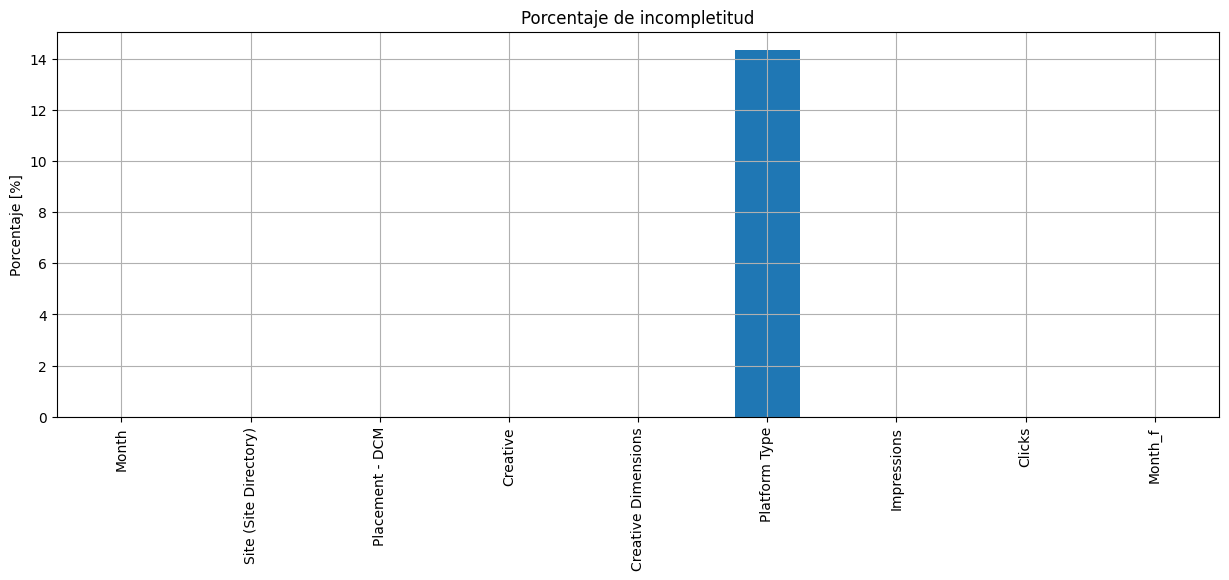

Desktop                           1090
Tablet                            1009
Smartphone                         840
NA No Platform                     576
Connected TV                       222
Mobile midrange: feature phone     139
(not set)                           90
Unknown platform                    49
Name: Platform Type, dtype: int64


,Month,Site (Site Directory),Placement - DCM,Creative,Creative Dimensions,Platform Type,Impressions,Clicks,Month_f
0,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,160x600,NA No Platform,494,8,2021-01-01
1,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,300x250,NA No Platform,5499,81,2021-01-01
2,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,728x90,NA No Platform,833,2,2021-01-01
3,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1624_v3_Symptom,160x600,NA No Platform,424,4,2021-01-01
4,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1624_v3_Symptom,300x250,NA No Platform,5431,73,2021-01-01
...,...,...,...,...,...,...,...,...,...
4239,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Desktop,4547,2,2021-10-01
4240,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Smartphone,5323,11,2021-10-01
4241,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Tablet,1758,6,2021-10-01
4242,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_728x90_v1,728x90,Desktop,2660,1,2021-10-01


In [115]:
# fix date column
rfi["Month_f"] = rfi["Month"].apply(lambda x : datetime.strptime(str(x), "%Y-%m"))

# limpieza de valores nulos
graficar_cantidad_nulos(rfi)

#are the "not set"values in platform type column the same endpoint as null values ?
# answer -> no, it might be data aquisition problem we have to report it to the data service adquisitor

rfi["Platform Type"]=rfi["Platform Type"].fillna('NA No Platform')
print(rfi["Platform Type"].value_counts())
rfi

<ipython-input-116-8c63c9679c87>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rfi.corr())


<Axes: >

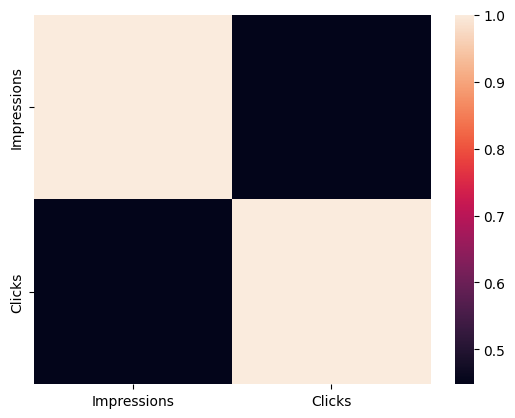

In [116]:
sns.heatmap(rfi.corr())

In [117]:
# for better analysis is helpful to stablish labels for small and big sources, in that way we can see the real performance of each group
# GA.groupby(by=["Users"], dropna=False).sum()


rfi_extra = pd.DataFrame(rfi.groupby(['Site (Site Directory)'])["Impressions"].sum()).reset_index()
rfi_extra.sort_values(by ='Impressions')
rfi_extra['label Imp']=rfi_extra["Impressions"].apply(lambda x : 'Big Site' if x >=13770222 else 'Medium Site' if (x >= 624382 and x < 13770222) else 'Small Site')
rfi_extra.loc[:,['Site (Site Directory)','label Imp']]

rfi=rfi.merge(rfi_extra.loc[:,['Site (Site Directory)','label Imp']], on='Site (Site Directory)', how='left')
rfi


,Month,Site (Site Directory),Placement - DCM,Creative,Creative Dimensions,Platform Type,Impressions,Clicks,Month_f,label Imp
0,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,160x600,NA No Platform,494,8,2021-01-01,Small Site
1,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,300x250,NA No Platform,5499,81,2021-01-01,Small Site
2,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,728x90,NA No Platform,833,2,2021-01-01,Small Site
3,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1624_v3_Symptom,160x600,NA No Platform,424,4,2021-01-01,Small Site
4,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1624_v3_Symptom,300x250,NA No Platform,5431,73,2021-01-01,Small Site
...,...,...,...,...,...,...,...,...,...,...
4010,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Desktop,4547,2,2021-10-01,Medium Site
4011,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Smartphone,5323,11,2021-10-01,Medium Site
4012,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Tablet,1758,6,2021-10-01,Medium Site
4013,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_728x90_v1,728x90,Desktop,2660,1,2021-10-01,Medium Site


In [118]:
rfi[~(rfi.Impressions<rfi.Clicks)]

,Month,Site (Site Directory),Placement - DCM,Creative,Creative Dimensions,Platform Type,Impressions,Clicks,Month_f,label Imp
0,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,160x600,NA No Platform,494,8,2021-01-01,Small Site
1,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,300x250,NA No Platform,5499,81,2021-01-01,Small Site
2,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,728x90,NA No Platform,833,2,2021-01-01,Small Site
3,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1624_v3_Symptom,160x600,NA No Platform,424,4,2021-01-01,Small Site
4,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1624_v3_Symptom,300x250,NA No Platform,5431,73,2021-01-01,Small Site
...,...,...,...,...,...,...,...,...,...,...
4010,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Desktop,4547,2,2021-10-01,Medium Site
4011,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Smartphone,5323,11,2021-10-01,Medium Site
4012,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Tablet,1758,6,2021-10-01,Medium Site
4013,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_728x90_v1,728x90,Desktop,2660,1,2021-10-01,Medium Site


In [119]:
# We stablish that have clicks with out impresions events is not true and it is noise data that must be cancelled
vals = rfi[~(rfi.Impressions<rfi.Clicks)].index.values
rfi=rfi.iloc[vals,:].reset_index(drop=True)
print(rfi.shape)
rfi

(3951, 10)


,Month,Site (Site Directory),Placement - DCM,Creative,Creative Dimensions,Platform Type,Impressions,Clicks,Month_f,label Imp
0,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,160x600,NA No Platform,494,8,2021-01-01,Small Site
1,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,300x250,NA No Platform,5499,81,2021-01-01,Small Site
2,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,728x90,NA No Platform,833,2,2021-01-01,Small Site
3,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1624_v3_Symptom,160x600,NA No Platform,424,4,2021-01-01,Small Site
4,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1624_v3_Symptom,300x250,NA No Platform,5431,73,2021-01-01,Small Site
...,...,...,...,...,...,...,...,...,...,...
3946,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Desktop,4547,2,2021-10-01,Medium Site
3947,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Smartphone,5323,11,2021-10-01,Medium Site
3948,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Tablet,1758,6,2021-10-01,Medium Site
3949,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_728x90_v1,728x90,Desktop,2660,1,2021-10-01,Medium Site


In [120]:
print(rfi.shape)
vals = rfi[~((rfi['Site (Site Directory)']=='Aptus Health') & (rfi.Month_f == '2021-10-01'))].index.values
rfi=rfi.iloc[vals,:].reset_index(drop=True)

vals = rfi[~((rfi['Site (Site Directory)']=='MyHealthTeams, Inc.') & (rfi.Month_f == '2021-03-01'))].index.values
rfi=rfi.iloc[vals,:]
print(rfi.shape)
rfi

(3951, 10)
(3948, 10)


,Month,Site (Site Directory),Placement - DCM,Creative,Creative Dimensions,Platform Type,Impressions,Clicks,Month_f,label Imp
0,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,160x600,NA No Platform,494,8,2021-01-01,Small Site
1,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,300x250,NA No Platform,5499,81,2021-01-01,Small Site
2,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1623_v3_50,728x90,NA No Platform,833,2,2021-01-01,Small Site
3,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1624_v3_Symptom,160x600,NA No Platform,424,4,2021-01-01,Small Site
4,2021-01,Health Union,SD.net Condition Center Sponsorship,SD_1624_v3_Symptom,300x250,NA No Platform,5431,73,2021-01-01,Small Site
...,...,...,...,...,...,...,...,...,...,...
3944,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Desktop,4547,2,2021-10-01,Medium Site
3945,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Smartphone,5323,11,2021-10-01,Medium Site
3946,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_300x250_v1,300x250,Tablet,1758,6,2021-10-01,Medium Site
3947,2021-10,Remedy Health,Skin Disease Condition Center,Dermicool_SDP_DTP_TalkToYourDoctor_728x90_v1,728x90,Desktop,2660,1,2021-10-01,Medium Site


In [121]:
#delete unnecesary columns
rfi = rfi.drop("Month",axis = 1)

### it seems like the RFI data set its already grouped so it doesnt need any other sum action, I will send this data to power BI to make visuals and extracts insights



# --------------------------------------------------------------------------------------------

# final Step is just save data to send it to visualization platform

In [122]:
# GA.to_csv(ruta_princ+"/GA_clean_data.csv",index=False)
rfi.to_csv(ruta_princ+"/rfi_clean_data.csv",index=False)

# Save in BBDD if its possible for live data coneections in power BI

In [21]:
from google.cloud import bigquery
client = bigquery.Client()

# TODO(developer): Set table_id to the ID of the table to create.
table_id = "project.dataset.registro_campañas"

schema = [
    bigquery.SchemaField("columns", "STRING", mode="REQUIRED"),
]
table = bigquery.Table(table_id, schema=schema)
table = client.create_table(table)

RefreshError: ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Google Compute Engine metadata service. Status: 404 Response:\nb''", <google.auth.transport.requests._Response object at 0x7f694788a7a0>)